In [93]:
#tensorflow version 
import tensorflow as tf


In [94]:
#to use MNIST dataset
mnist = tf.keras.datasets.mnist

In [95]:
#loading MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # download mnist.npz


In [96]:
#checking instances for training
print("x_train shape is:",x_train.shape);
print("y_train shape is:",y_train.shape);


x_train shape is: (60000, 28, 28)
y_train shape is: (60000,)


In [97]:
#checking instances for testing
print("x_test shape is:",x_test.shape);
print("y_test shape is:",y_test.shape);

x_test shape is: (10000, 28, 28)
y_test shape is: (10000,)


In [98]:
#first element shape
x_train[1].shape

(28, 28)

In [99]:
#To check 1st image
x_train[1]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [100]:
#as number are not interpretable because it is in numpy array format we are using matplotlib to see image

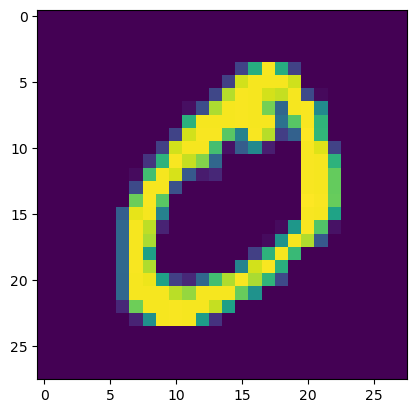

In [101]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [102]:
#to check label associated with 1st image
y_train[1]

0

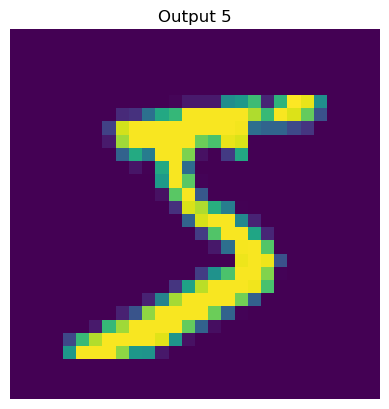

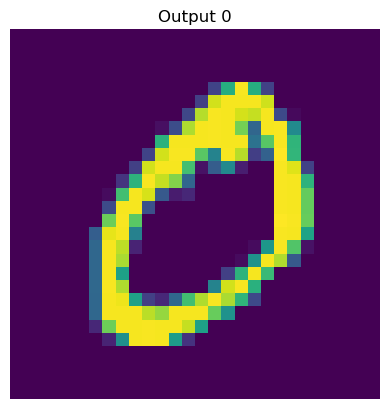

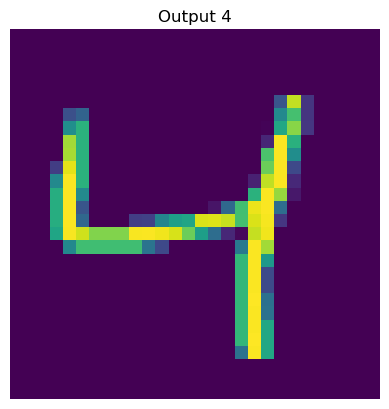

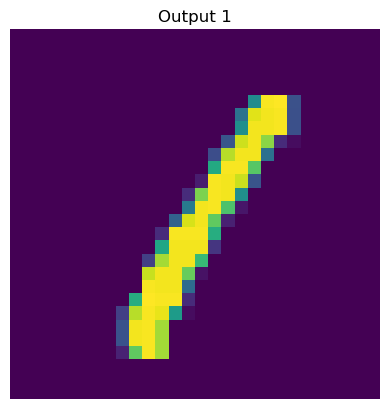

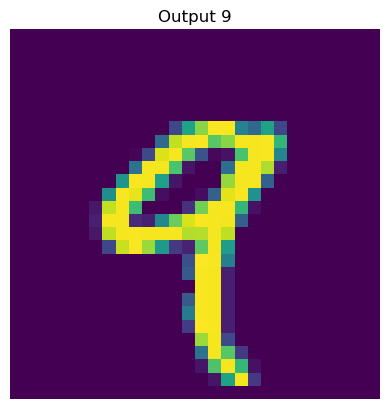

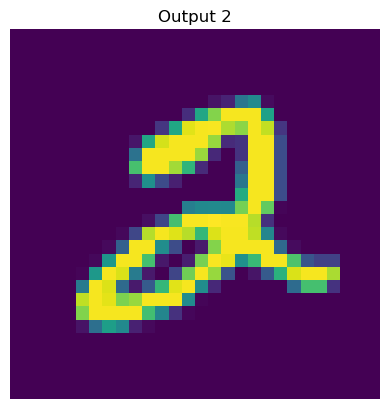

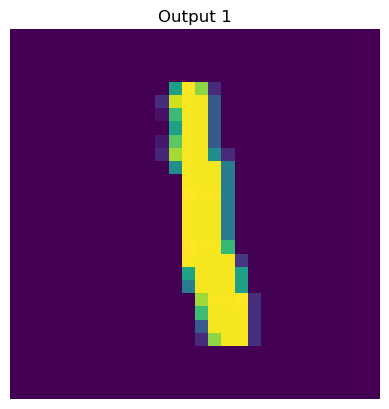

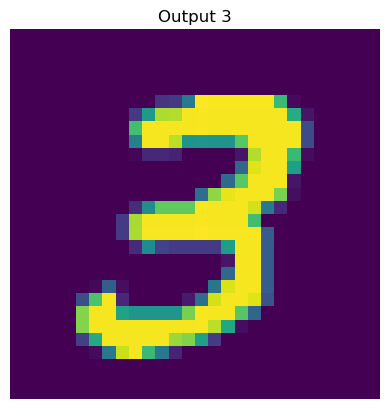

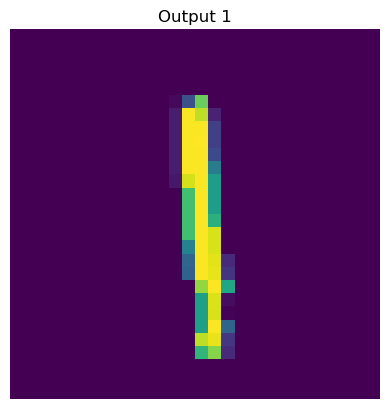

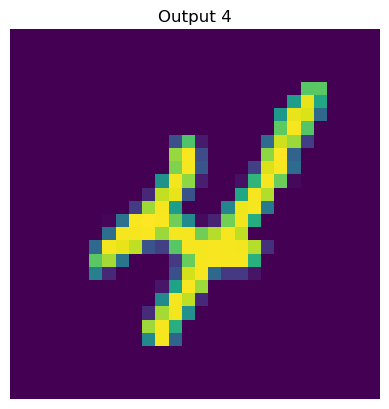

In [103]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 10

# Loop through the number of images and plot each one
for i in range(num_images):
    plt.figure()  # Create a new figure for each image
    plt.imshow(x_train[i])
    plt.title(f'Output {y_train[i]}')
    plt.axis('off')  # Hide the axis
# Show all the figures
plt.show()


In [104]:
# we are getting output of training images in the format of 0 to 255 numpy array which is heavy to pass to the input layer 
#so we are converting input into 0 to 1 
x_train = x_train/255.0
x_test = x_test/255.0


In [105]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [106]:
#reshape all images into array
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))
x_train[1].shape

(784,)

In [107]:
# one hot encoding of testing data
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [108]:
#creating neural network(empty model)
model = tf.keras.models.Sequential()
# add layer
model.add(tf.keras.layers.InputLayer(input_shape=(784,)))  # Input layer
#activation function 
model.add(tf.keras.layers.Dense(10,activation='softmax')) #output layer softmax becaz it is multi class classification problem
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model.compile(
    optimizer='sgd',  # Stochastic Gradient Descent optimizer
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Categorical cross-entropy loss
    metrics=['accuracy']  # Metrics to track
)

In [110]:
model.fit(x_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 4s 637us/step - loss: 0.5361 - accuracy: 0.8632
Epoch 2/10
6000/6000 [==============================] - 3s 563us/step - loss: 0.3603 - accuracy: 0.9002
Epoch 3/10
6000/6000 [==============================] - 3s 564us/step - loss: 0.3321 - accuracy: 0.9075
Epoch 4/10
6000/6000 [==============================] - 3s 581us/step - loss: 0.3175 - accuracy: 0.9110
Epoch 5/10
6000/6000 [==============================] - 3s 580us/step - loss: 0.3079 - accuracy: 0.9138
Epoch 6/10
6000/6000 [==============================] - 3s 570us/step - loss: 0.3009 - accuracy: 0.9162
Epoch 7/10
6000/6000 [==============================] - 3s 567us/step - loss: 0.2955 - accuracy: 0.9174
Epoch 8/10
6000/6000 [==============================] - 3s 572us/step - loss: 0.2914 - accuracy: 0.9184
Epoch 9/10
6000/6000 [==============================] - 3s 566us/step - loss: 0.2880 - accuracy: 0.9190
Epoch 10/10
6000/6000 [==============================] - 3s 577u